# Exploratory Data Analysis (EDA) - CIFAR-10

This notebook explores the CIFAR-10 dataset prepared in ImageFolder format.

Goals:
- Verify dataset structure
- Inspect class distribution
- Visualize sample images
- Compute mean and standard deviation for normalization


In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader
from collections import Counter


## Load Dataset

We load the dataset using `ImageFolder` from the processed directory.


In [2]:
train_dataset = ImageFolder("../data/processed/train")
test_dataset = ImageFolder("../data/processed/test")


len(train_dataset), len(test_dataset)


(50000, 10000)

In [3]:
img = train_dataset[0]
print(type(img))
print(type(train_dataset))


<class 'tuple'>
<class 'torchvision.datasets.folder.ImageFolder'>


In [4]:
for i in range(3):
    img, label = train_dataset[i]
    print(img, label)

<PIL.Image.Image image mode=RGB size=32x32 at 0x21CD3509B50> 0
<PIL.Image.Image image mode=RGB size=32x32 at 0x21CFAAE6610> 0
<PIL.Image.Image image mode=RGB size=32x32 at 0x21CFAAE6850> 0


## Class Names

CIFAR-10 contains 10 classes.


In [5]:
class_names = train_dataset.classes
print(class_names)
len(class_names)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


10

## Class Distribution

We verify whether the dataset is balanced.


In [6]:
labels = [label for _, label in train_dataset]
counts = Counter(labels)

for idx, count in counts.items():
    print(f"{class_names[idx]}: {count}")


airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


The dataset is perfectly balanced across all 10 classes.


## Sample Images

We visualize random samples from the training set.


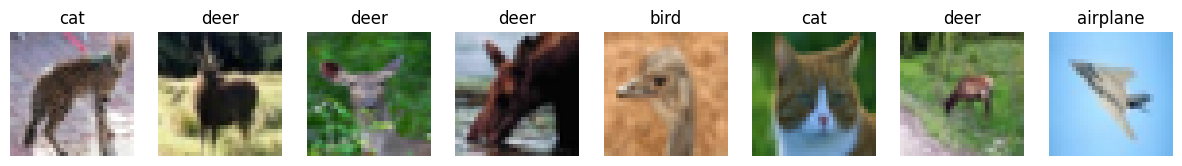

In [7]:
plt.figure(figsize=(15, 3))

for i in range(8):
    index = random.randint(0, len(train_dataset) - 1)
    image, label = train_dataset[index]
    
    plt.subplot(1, 8, i + 1)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis("off")

plt.show()


## Image Dimensions

We verify image shape.


In [8]:
img, label = train_dataset[0]
np.array(img).shape


(32, 32, 3)

### Image Shape Interpretation (Important for CNN instead MLP)

The image shape is (32, 32, 3), which means:

- 32 pixels in height
- 32 pixels in width
- 3 color channels (Red, Green, Blue)

Each image therefore contains 32 × 32 × 3 = 3072 numerical values.

In a fully connected neural network, these values would be flattened into a 3072-dimensional vector.
However, for image classification tasks, Convolutional Neural Networks (CNNs) are preferred because they preserve the spatial structure of the image.


## Compute Mean and Standard Deviation

These values will be used for normalization during training.


In [12]:
transform = transforms.ToTensor()
train_dataset_tensor = ImageFolder("../data/processed/train", transform=transform)
print(train_dataset_tensor)

loader = DataLoader(train_dataset_tensor, batch_size=512, shuffle=False)

mean = 0.
std = 0.
total_images = 0

for images, _ in loader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images += batch_samples

mean /= total_images
std /= total_images

mean, std


Dataset ImageFolder
    Number of datapoints: 50000
    Root location: ../data/processed/train
    StandardTransform
Transform: ToTensor()


(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2023, 0.1994, 0.2010]))

## Conclusions

- The dataset contains 50,000 training and 10,000 test images.
- Images are RGB with size 32x32.
- The dataset is perfectly balanced across 10 classes.
- Computed mean and standard deviation will be used for normalization.
- The dataset is suitable for CNN-based image classification.


## Final Remarks

The CIFAR-10 dataset is a well-known benchmark dataset for image classification tasks.
It is already structured and balanced, making it directly suitable for training deep learning models.

However, even though the dataset is standardized and widely used, we performed a brief exploratory data analysis (EDA) to:

- Verify the integrity of the processed data
- Confirm class balance
- Inspect image dimensions and format
- Compute normalization statistics (mean and standard deviation)

This analysis ensures that the dataset has been correctly prepared and is ready for model training.
The computed normalization values will be used in the training pipeline to improve model convergence.

Although the dataset does not require extensive exploratory analysis, this verification step increases reliability and reproducibility of the overall pipeline.
